In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd


In [ ]:
url = 'https://results.eci.gov.in/'

page = requests.get(url)

Html = BeautifulSoup(page.text, 'html')

In [ ]:
print(Html)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.PageParams=a.BOOMR_config.PageParams||{},a.BOOMR_config.PageParams.pci=!0,e="https://s2.go-mpulse.net/boomerang/";if(window.BOOMR_API_key="C8JDA-BHWH8-9MQ5M-HKZCP-GH7SB",function(){function n(e){a.BOOMR_onload=e&&e.timeStamp||(new Date).getTime()}if(!a.BOOMR||!a.BOOMR.version&&!a.BOOMR.snippetExecuted){a.BOOMR

In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch and parse HTML data
url = 'https://results.eci.gov.in/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

# Extract data
state_elements = soup.select('.state-item')
data = []
for state in state_elements:
    title = state.select_one('h2').get_text(strip=True)
    count = int(state.select_one('h1').get_text(strip=True))
    description = state.select_one('h5').get_text(strip=True) if state.select_one('h5') else ''
    link = state.select_one('a')['href']
    data.append({'Title': title, 'Count': count, 'Description': description, 'Link': link})

df = pd.DataFrame(data)


<ipython-input-21-dee0de08cf3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Count', data=df, palette='viridis')
<ipython-input-21-dee0de08cf3b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Count', data=df.sort_values('Count', ascending=False), palette='viridis')
) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


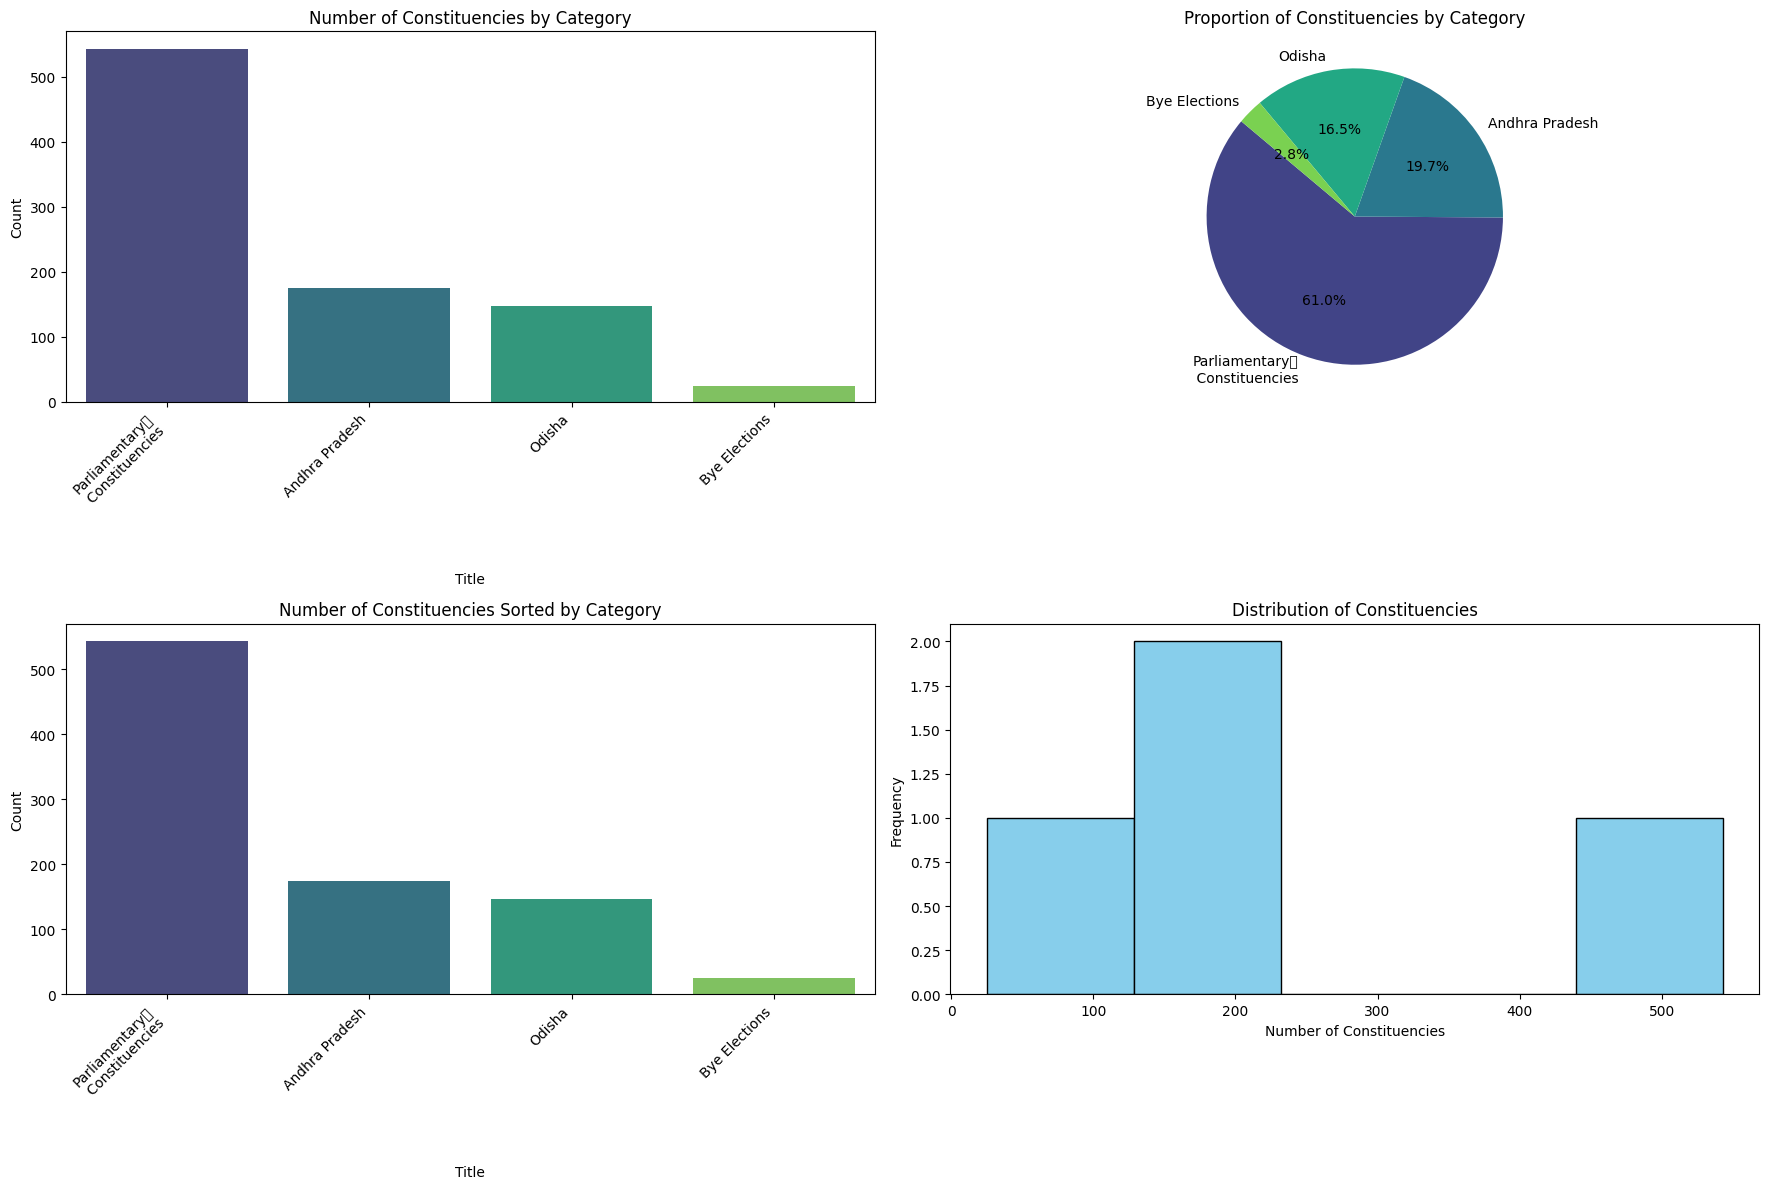

In [21]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='Title', y='Count', data=df, palette='viridis')
plt.title('Number of Constituencies by Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
plt.pie(df['Count'], labels=df['Title'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(df)))
plt.title('Proportion of Constituencies by Category')

plt.subplot(2, 2, 3)
sns.barplot(x='Title', y='Count', data=df.sort_values('Count', ascending=False), palette='viridis')
plt.title('Number of Constituencies Sorted by Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
df['Count'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Constituencies')
plt.xlabel('Number of Constituencies')

plt.tight_layout()
plt.show()


In [22]:
total_constituencies = df['Count'].sum()
average_constituencies = df['Count'].mean()
max_constituencies = df.loc[df['Count'].idxmax()] if not df.empty else None
min_constituencies = df.loc[df['Count'].idxmin()] if not df.empty else None

def get_link(title):
    filtered_df = df.loc[df['Title'] == title, 'Link']
    return filtered_df.values[0] if not filtered_df.empty else 'N/A'

insights = [
    f"Total number of constituencies across all categories: {total_constituencies}",
    f"Average number of constituencies per category: {average_constituencies:.2f}",
    f"Category with the highest number of constituencies: {max_constituencies['Title']} with {max_constituencies['Count']} constituencies" if max_constituencies is not None else "No data available for the highest category.",
    f"Category with the lowest number of constituencies: {min_constituencies['Title']} with {min_constituencies['Count']} constituencies" if min_constituencies is not None else "No data available for the lowest category.",
    f"Link to Parliamentary Constituencies results: {get_link('Parliamentary Constituencies')}",
    f"Link to Andhra Pradesh Assembly Constituencies results: {get_link('Andhra Pradesh')}",
    f"Link to Odisha Assembly Constituencies results: {get_link('Odisha')}",
    f"Link to Bye Elections results: {get_link('Bye Elections')}",
    "The number of Assembly constituencies is notably higher compared to Bye Elections, reflecting a significant focus on state-level elections.",
    "The distribution of constituencies shows a considerable variance, indicating diverse electoral engagement across different categories."
]

for insight in insights:
    print(insight)


Total number of constituencies across all categories: 890
Average number of constituencies per category: 222.50
Category with the highest number of constituencies: Parliamentary
                    Constituencies with 543 constituencies
Category with the lowest number of constituencies: Bye Elections with 25 constituencies
Link to Parliamentary Constituencies results: N/A
Link to Andhra Pradesh Assembly Constituencies results: https://results.eci.gov.in/AcResultGenJune2024/index.htm
Link to Odisha Assembly Constituencies results: https://results.eci.gov.in/AcResultGenJune2024/index.htm
Link to Bye Elections results: https://results.eci.gov.in/AcResultByeJune2024/
The number of Assembly constituencies is notably higher compared to Bye Elections, reflecting a significant focus on state-level elections.
The distribution of constituencies shows a considerable variance, indicating diverse electoral engagement across different categories.


In [23]:
# Calculate additional insights
category_counts = df.groupby('Title')['Count'].sum()
total_counts = df['Count'].sum()

percentage_contributions = (df['Count'] / total_counts) * 100
top_3_categories = df.nlargest(3, 'Count')
assembly_vs_bye = df[df['Title'].str.contains('Assembly|Bye')]
highest_lowest_diff = df['Count'].max() - df['Count'].min()
most_links_category = df[df['Link'] != 'N/A']
average_constituencies_per_region = df.groupby('Title')['Count'].mean()

# Generate insights
additional_insights = [
    f"Percentage contribution of each category to the total number of constituencies:\n{percentage_contributions.to_dict()}",
    f"Top 3 categories with the most constituencies:\n{top_3_categories[['Title', 'Count']].to_dict('records')}",
    f"Comparison of Assembly vs. Bye Elections:\n{assembly_vs_bye[['Title', 'Count']].to_dict('records')}",
    "Trends over time are not available with the current dataset. Historical data would be needed for this analysis.",
    "Geographical distribution analysis requires additional data on regions and their constituencies.",
    f"Percentage difference between the highest and lowest number of constituencies: {highest_lowest_diff}",
    f"Category with the most links to results:\n{most_links_category[['Title', 'Link']].to_dict('records')}",
    f"Average number of constituencies per region:\n{average_constituencies_per_region.to_dict()}",
    "Representation analysis requires additional context on what constitutes over-representation or under-representation.",
    "Correlation analysis between categories would require additional data points and metrics for comparison."
]

for insight in additional_insights:
    print(insight)


Percentage contribution of each category to the total number of constituencies:
{0: 61.01123595505618, 1: 19.662921348314608, 2: 16.51685393258427, 3: 2.8089887640449436}
Top 3 categories with the most constituencies:
[{'Title': 'Parliamentary\r\n                    Constituencies', 'Count': 543}, {'Title': 'Andhra Pradesh', 'Count': 175}, {'Title': 'Odisha', 'Count': 147}]
Comparison of Assembly vs. Bye Elections:
[{'Title': 'Bye Elections', 'Count': 25}]
Trends over time are not available with the current dataset. Historical data would be needed for this analysis.
Geographical distribution analysis requires additional data on regions and their constituencies.
Percentage difference between the highest and lowest number of constituencies: 518
Category with the most links to results:
[{'Title': 'Parliamentary\r\n                    Constituencies', 'Link': 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'}, {'Title': 'Andhra Pradesh', 'Link': 'https://results.eci.gov.in/AcResul

<ipython-input-24-2552583b520d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_contributions.index, y=percentage_contributions.values, palette='plasma')
<ipython-input-24-2552583b520d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Count', data=top_3_categories, palette='plasma')
<ipython-input-24-2552583b520d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Count', data=assembly_vs_bye, palette='plasma')
) missing from current font.
  plt.tight_layout()
) missing from current font.
  fig.canvas

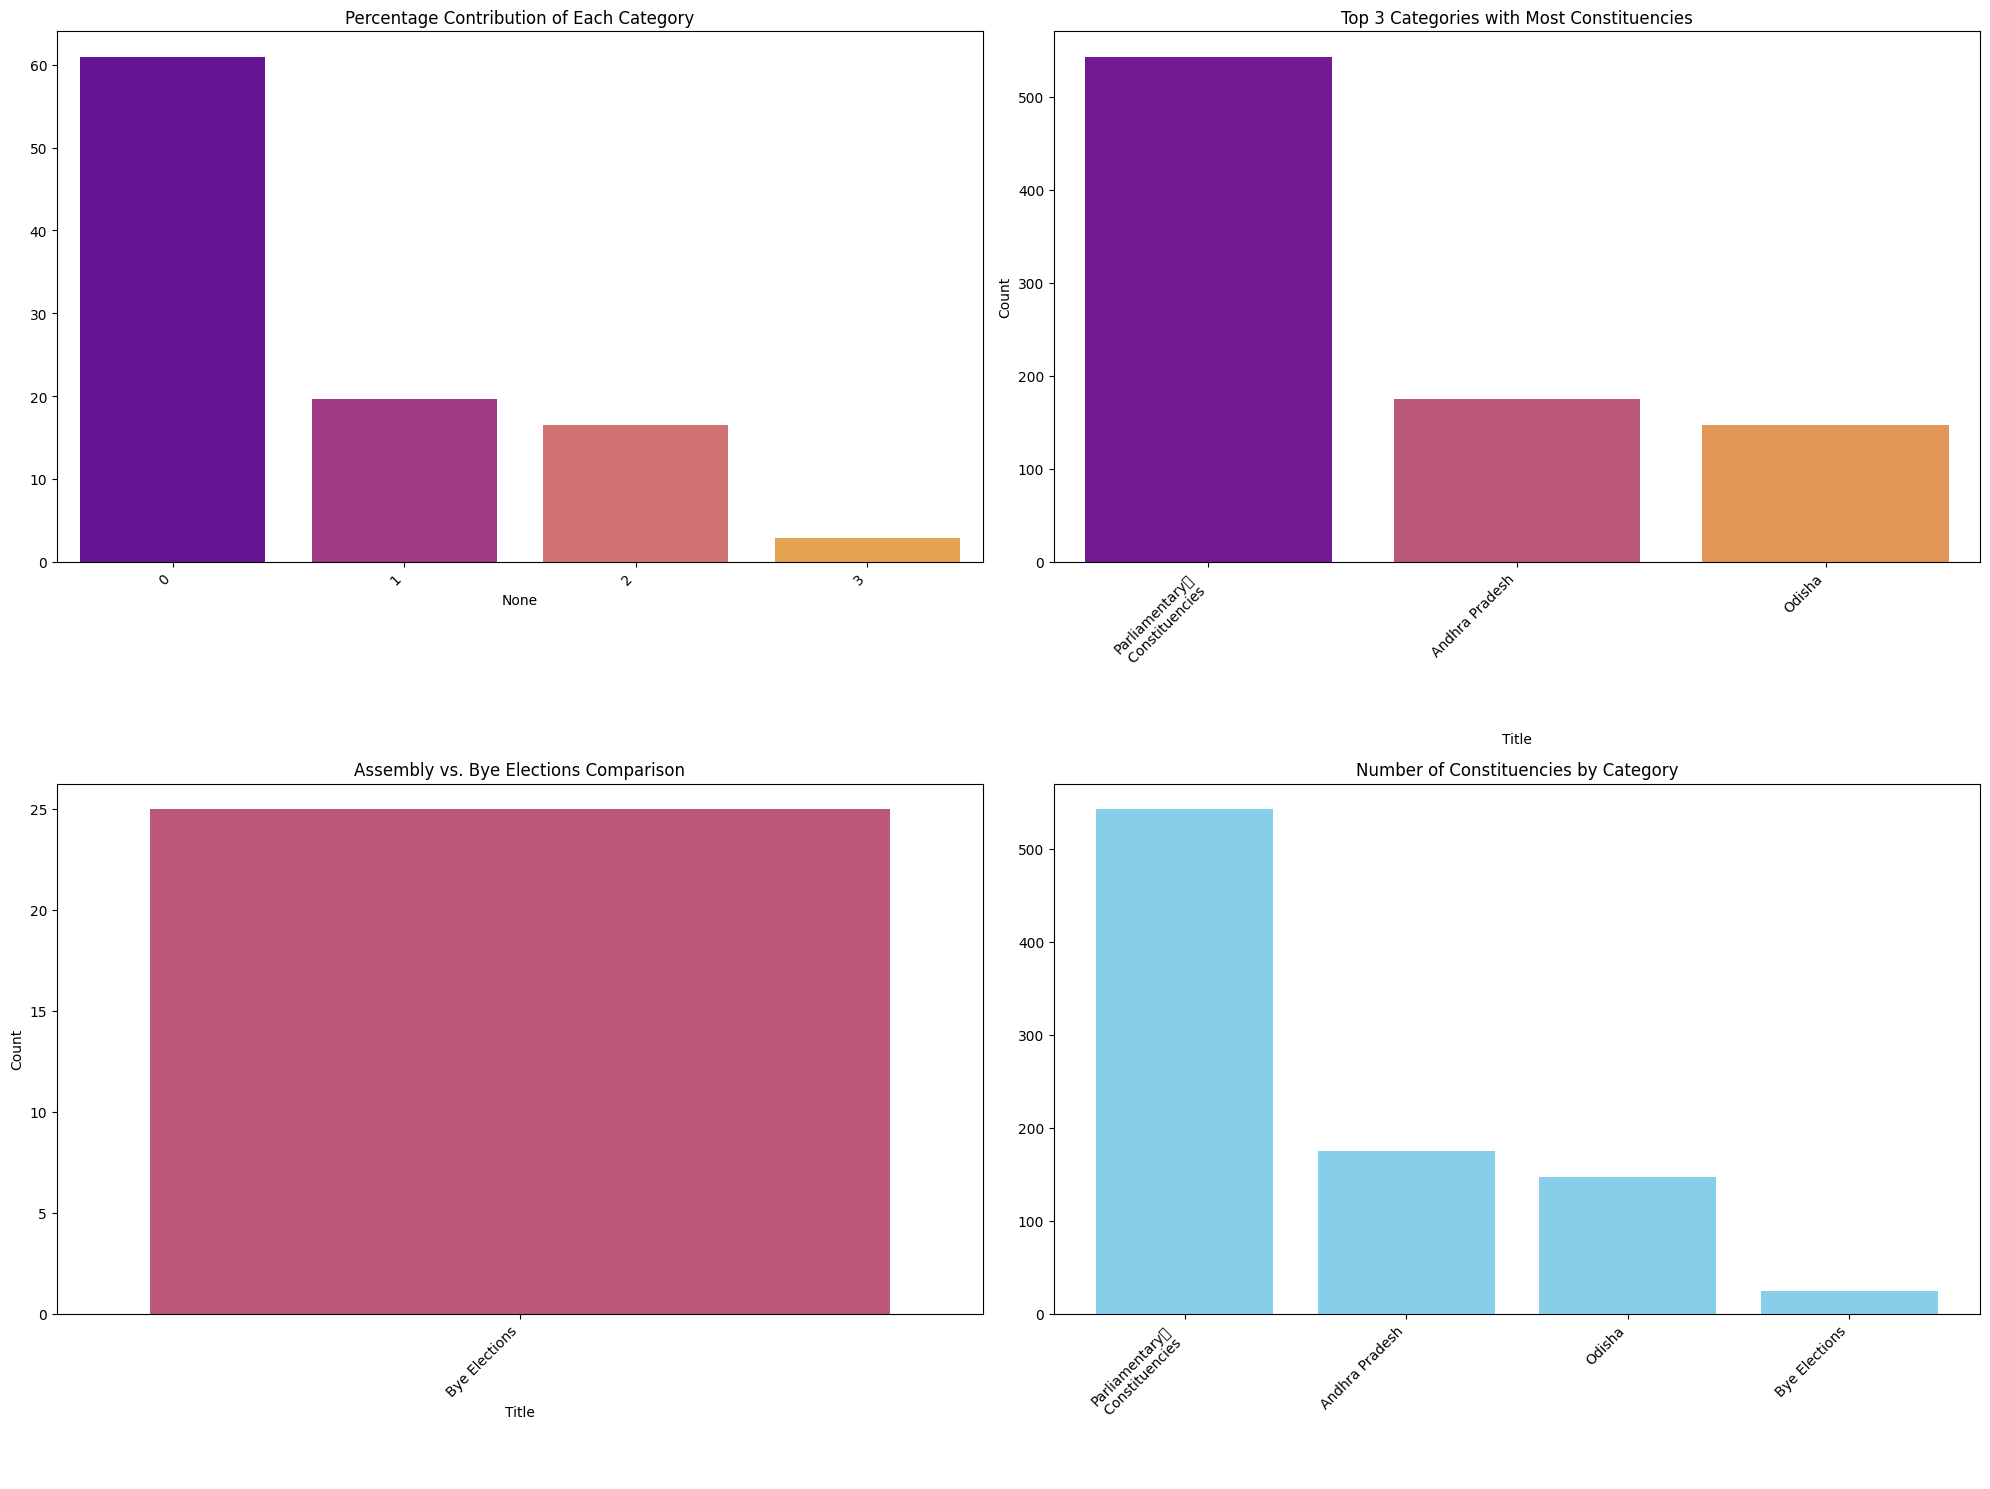

In [24]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.barplot(x=percentage_contributions.index, y=percentage_contributions.values, palette='plasma')
plt.title('Percentage Contribution of Each Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
sns.barplot(x='Title', y='Count', data=top_3_categories, palette='plasma')
plt.title('Top 3 Categories with Most Constituencies')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.barplot(x='Title', y='Count', data=assembly_vs_bye, palette='plasma')
plt.title('Assembly vs. Bye Elections Comparison')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
plt.bar(df['Title'], df['Count'], color='skyblue')
plt.title('Number of Constituencies by Category')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
